In [119]:
import pandas as pd # importing pandas, used for data manupulation and analysis
import plotly.express as px # importing plotly express library, it is used for creting interactive visualizations. 

In [121]:
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [123]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [125]:
df.info() # for checking information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [127]:
df.describe() # for knowing descriptive statistisc.

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [129]:
df.columns #for checking columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [131]:
df.shape #for checking no. of rows and columns

(7043, 21)

In [133]:
df.duplicated().sum() # for checking sum of duplicated data

0

In [135]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [137]:
# Check rows where TotalCharges contains only whitespace characters

blank_rows = df[df['TotalCharges'].str.strip() == ""] #for removing whitespace from total charges

print("Number of rows with only space in 'TotalCharges':", len(blank_rows)) #printing with countof rows 
print(blank_rows[['customerID', 'tenure', 'TotalCharges']]) # printing blank rows

Number of rows with only space in 'TotalCharges': 11
      customerID  tenure TotalCharges
488   4472-LVYGI       0             
753   3115-CZMZD       0             
936   5709-LVOEQ       0             
1082  4367-NUYAO       0             
1340  1371-DWPAZ       0             
3331  7644-OMVMY       0             
3826  3213-VVOLG       0             
4380  2520-SGTTA       0             
5218  2923-ARZLG       0             
6670  4075-WKNIU       0             
6754  2775-SEFEE       0             


In [139]:
# Convert all values to strings and strip whitespace

df_stripped = df.astype(str).applymap(lambda x: x.strip()) #astype converts all values to strings, applymap applies
# the strip function to every cell to remove leading/trailing whitespace

space_rows = df_stripped.eq("").any(axis=1) # for checking which rows have any empty strings, eq checks for empty string, 
# any(axis=1) returns true for rows where any column is empty

rows_with_spaces = df[space_rows] # now filter original dataframe to show only problematic rows 

# Print result
print("Number of rows with space-only values in any column:", len(rows_with_spaces)) #show how many rows contain whitespace only  values
print(rows_with_spaces)

Number of rows with space-only values in any column: 11
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No 

C:\Users\Manish kumar rajak\AppData\Local\Temp\ipykernel_15368\1475363420.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [145]:
# to replace blank TotalCharges with 0 for tenure=0 customers
df.loc[(df['tenure'] == 0) & (df['TotalCharges'].str.strip() == ""), 'TotalCharges'] = 0

In [170]:
df.isnull().values.any() # it checks that any missing values are present or not, true= exist, false= not exist

False

In [172]:
df_cleaned = df

In [174]:
print("\nChurn Rate:\n", df['Churn'].value_counts(normalize=True))# here I'm counting chrn, chrun = yes means the
#customer has left the telecom service. and Churn No means the customer is still using the service means they are 
# active in company


Churn Rate:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


## --------------- VISUALIZATIONS ---------------- 

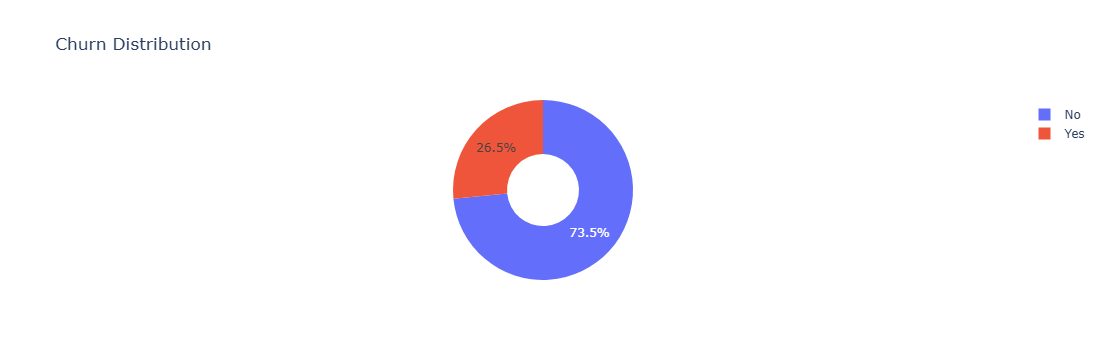

In [164]:
# Churn Distribution
px.pie(df, names='Churn', title='Churn Distribution', hole=0.4).show() # for creating an interactive pie chart showing
# customer churn distribution, df contain data, names= churn will show only yes/no values, hole for donut chart and
# o.4 means 40% hole in center, after that I display the cart. 

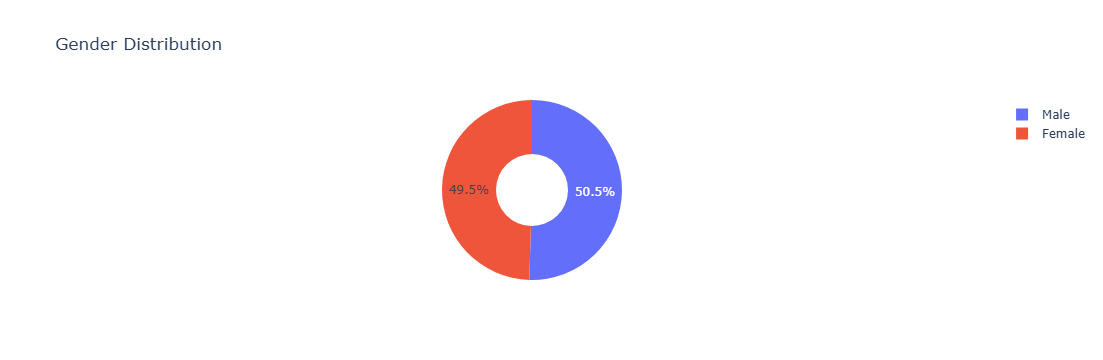

In [166]:
#  Gender Distribution
px.pie(df, names='gender', title='Gender Distribution', hole=0.4).show()  # for creating an interactive pie chart showing 
# gender distribution of customers. 


### How do customer tenure, monthly charges, and total spending relate to each other, and does being a senior citizen affect this?

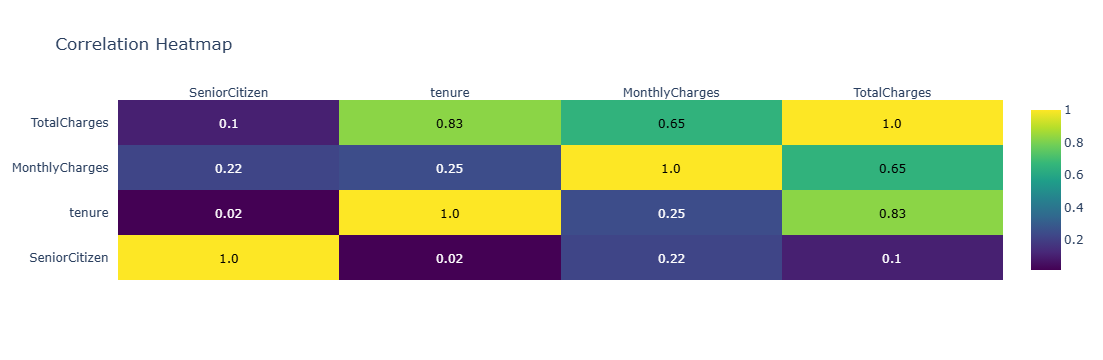

In [88]:
# Ensure TotalCharges is numeric and remove bad rows

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # for changing totlacharges to no. and turning any 
# bad value into non or not a no. 

df_cleaned = df.dropna(subset=['TotalCharges']) # for only keeping cleaned data

df_cleaned['SeniorCitizen'] = pd.to_numeric(df_cleaned['SeniorCitizen'], errors='coerce') # for converting seniorcitizen to numbers, and 
# turning bad values into NaN

# Now select only numeric columns and compute correlation
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'] # for these columns we want to check
corr_df = df_cleaned[numeric_cols].corr() #for checking how these columns are related to each other

# Plot using Plotly
import plotly.figure_factory as ff  # plotly.figure_factory is a tool that help to draw a heatmap 

fig = ff.create_annotated_heatmap( # for drawing a heatmap showing the relationships, with labels and numbers on it
    z=corr_df.values,  # for showing correlation no. 
    x=list(corr_df.columns),  # for labeling for the x-axis
    y=list(corr_df.columns), # labeling for the y-axis 
    annotation_text=corr_df.round(2).values, # showing the no. rounded to 2 decimal
    showscale=True, # for adding a color scale on the side
    colorscale='Viridis' # for using the color style
)
fig.update_layout(title='Correlation Heatmap') # for title purpose
fig.show() # for showing heatmap on the screen 


### KEY INSIGHTS: 
#### 1. TotalCharges & Tenure (Strong +0.83):-The longer customers stay (tenure), the more they spend (TotalCharges). Loyal customers = More revenue.
#### 2. MonthlyCharges & TotalCharges (+0.65):- Higher monthly bills lead to higher total spending over time.
#### 3. Tenure & MonthlyCharges (Weak -0.02):- Monthly bills don’t really change how long customers stay. Price hikes may not push them away.
#### 4. SeniorCitizen (No Strong Links):-Being a senior doesn’t strongly affect spending or loyalty.

###  1. How does churn vary across different customer tenures, and what is the monthly charge trend within each group?
#### This question combines churn analysis + tenure segmentation + charge behavior.

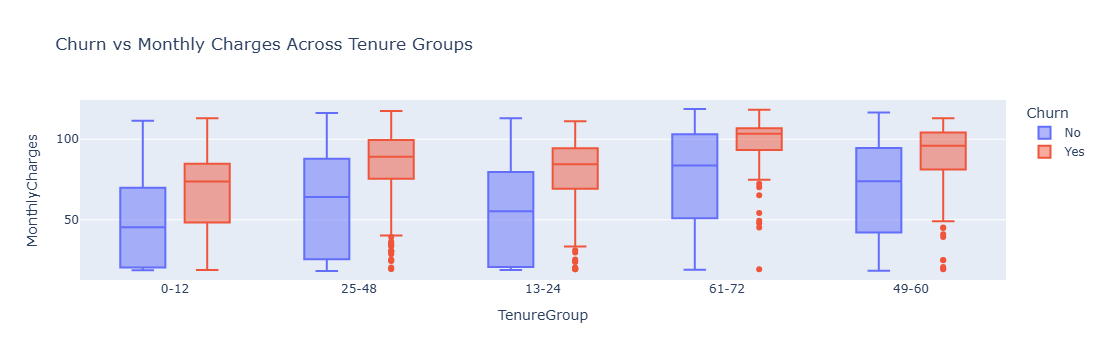

In [92]:
# # Creating a new column 'TenureGroup' that groups the 'tenure' values into categories based on months
df_cleaned['TenureGroup'] = pd.cut(df_cleaned['tenure'], bins=[0, 12, 24, 48, 60, 72], 
                                   labels=['0-12', '13-24', '25-48', '49-60', '61-72'])  #pd.cut is a function to divide the
# tenure column which represents the no. of months, bins defines the boundries of ranges, and label arugument assigns to each range values. 

# Generating a box plot using Plotly Express to visualize 'MonthlyCharges' across 'TenureGroup', with colors indicating 'Churn' status
px.box(df_cleaned, x='TenureGroup', y='MonthlyCharges', color='Churn',
       title='Churn vs Monthly Charges Across Tenure Groups').show()


### Key Insights from Monthly Charges vs Tenure Group (Churn Analysis)
#### 1. High churn is observed among new customers (0–12 months) who are paying higher monthly charges. These users are likely leaving due to early dissatisfaction or pricing concerns.
####  2. Mid-tenure customers (13–48 months) show a moderate churn rate, especially when their charges are above average. They may be reconsidering the value for cost over time.
####  3. Long-term customers (49–72 months) have the lowest churn rate and usually pay lower, stable charges, indicating strong loyalty and satisfaction.

### What combination of contract type and payment method leads to the highest churn?
#### This helps identify toxic combinations of customer attributes.

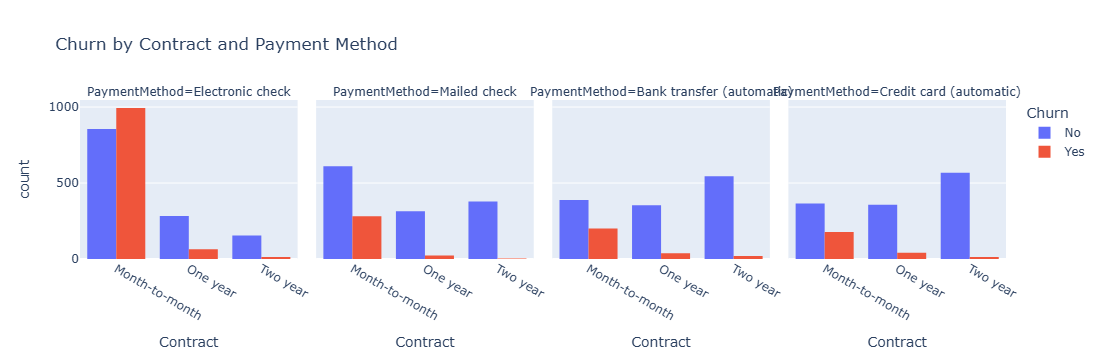

In [184]:
px.histogram(df_cleaned,  # using cleaned data
             x='Contract',  # for setting the x-axis to show different contract types like month to month,etc.
             color='Churn', # color the bars based on churn status like yes or no
             barmode='group', # for grouping the bars side by side for each contract type to compare churn categories
             facet_col='PaymentMethod', # for creating sepearte histogram for each payment method. 
             title='Churn by Contract and Payment Method' # for title
            ).show()  # creating a histogram using 
# plotly express to visualize churn rates across contract types and payment methods


### KEY INSIGHTS: 
#### 1. Month-to-month contracts have the highest churn, especially among customers using Electronic checks. This shows that flexible contracts + high-risk payment methods = high churn.
#### 2. One-year and Two-year contracts show much lower churn, regardless of payment method. These longer-term contracts encourage customer retention.
#### 3. Customers using Credit cards or Bank transfers tend to churn less, suggesting these methods may be preferred by more stable, long-term users.

###  3. Among senior citizens, which services are associated with the highest churn?
#### Targeting demographic-service interaction

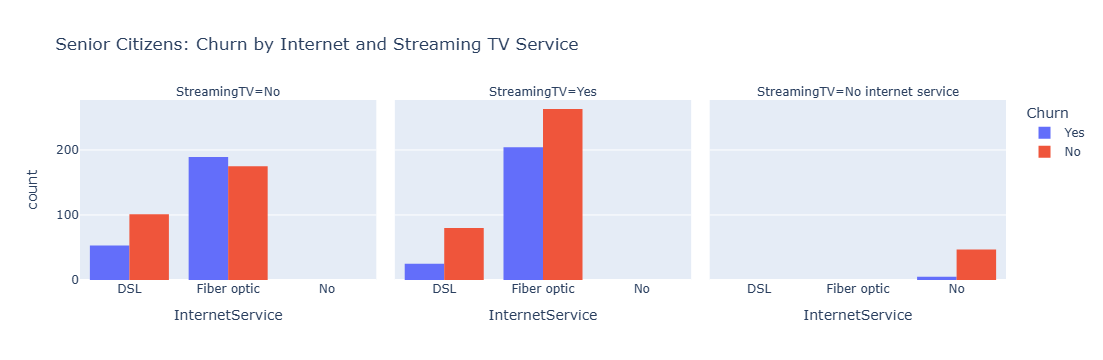

In [100]:
senior_df = df_cleaned[df_cleaned['SeniorCitizen'] == 1]  # for filtering the cleaned dataframe to include only
# senior citizens where seniorcitizen == 1
px.histogram( # for creating hisogram using plotly express 
             senior_df,     #using the filtered dataframe containing only senior citizens  
             x='InternetService',  # 
             color='Churn',
             barmode='group', 
             facet_col='StreamingTV',
             title='Senior Citizens: Churn by Internet and Streaming TV Service'
            ).show()


###  KEY INSIGHTS: 
#### 1. Senior citizens using Fiber optic internet are most likely to leave, especially if they also have Streaming TV. This may be due to higher costs or too many technical services.
#### 2. Those with DSL internet show moderate churn, but still more than those with no internet service.
#### 3.  Senior citizens without internet and without Streaming TV rarely leave, indicating they prefer simple, low-cost plans.

### How does churn probability change with monthly charges and tenure — can we visualize a churn risk cluster?
#### Advanced 2D density + class separation.

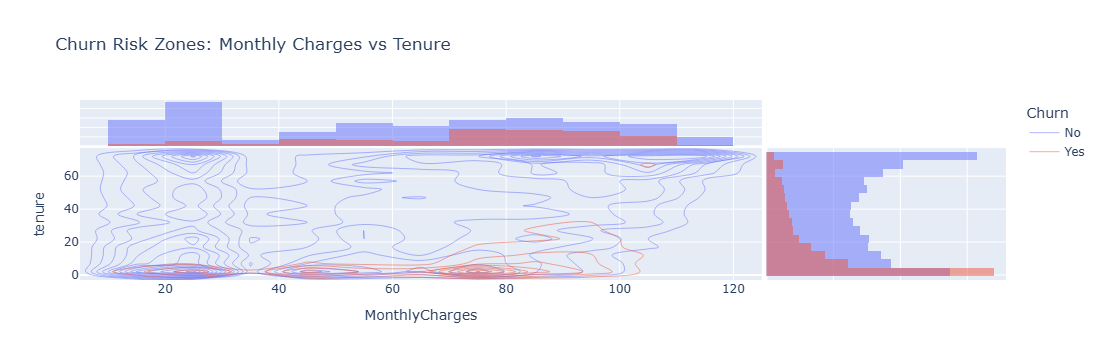

In [104]:
px.density_contour(df_cleaned, x='MonthlyCharges', y='tenure', color='Churn',
                   title='Churn Risk Zones: Monthly Charges vs Tenure',
                   marginal_x="histogram", marginal_y="histogram").show()


### KEY INSIGHTS: 
#### 1.  Customers with high monthly charges and low tenure churn the most.
#### New customers who pay a lot are most likely to leave early.
#### 2. Customers with low tenure but lower charges have mixed churn behavior.
#### Some stay, some leave — possibly based on service experience.
#### 3. Long-term customers (those who have been with us for a long time) rarely leave, even if prices go up. They are loyal and comfortable with our service and pricing.

### Which service combinations (e.g., Internet + Phone + Streaming) show the most churn?
#### Detecting patterns from service bundles.

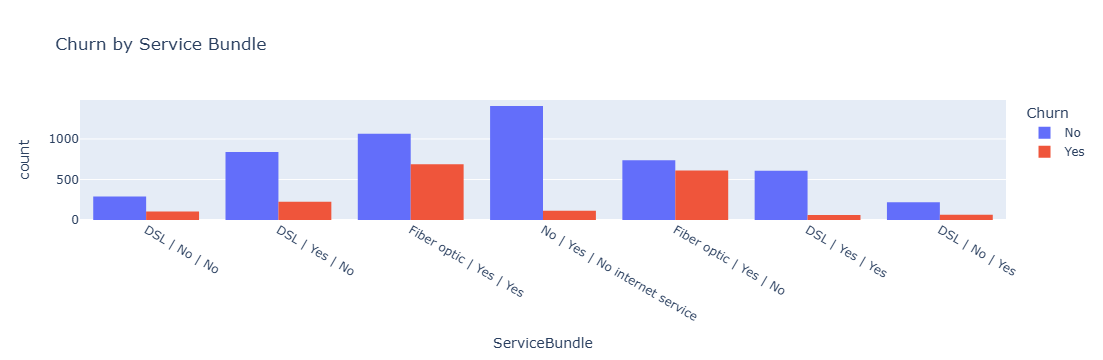

In [108]:
# Create a service bundle label
df_cleaned['ServiceBundle'] = df_cleaned['InternetService'] + " | " + \
                              df_cleaned['PhoneService'] + " | " + \
                              df_cleaned['StreamingTV']

px.histogram(df_cleaned, x='ServiceBundle', color='Churn', barmode='group',
             title='Churn by Service Bundle', height=500).show()


### KEY INSIGHTS: 
#### 1. Internet-only users leave more often – People who only have internet (without phone or TV) are more likely to cancel.
#### 2. Bundles keep customers longer – Those who have internet, phone, and TV together stay with the company more.
#### 3. Phone + TV without internet is unusual – Very few customers have just phone and TV service (might be a data error).